In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('../UAS/Dataset/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Hal ini menunjukkan adanya missing value pada kolom tersebut
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Langkah 2: Menyiapkan data
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
# Langkah 3: Standarisasi/normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Langkah 4: Menggunakan algoritma k-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
data['KMeans_Cluster'] = kmeans.labels_

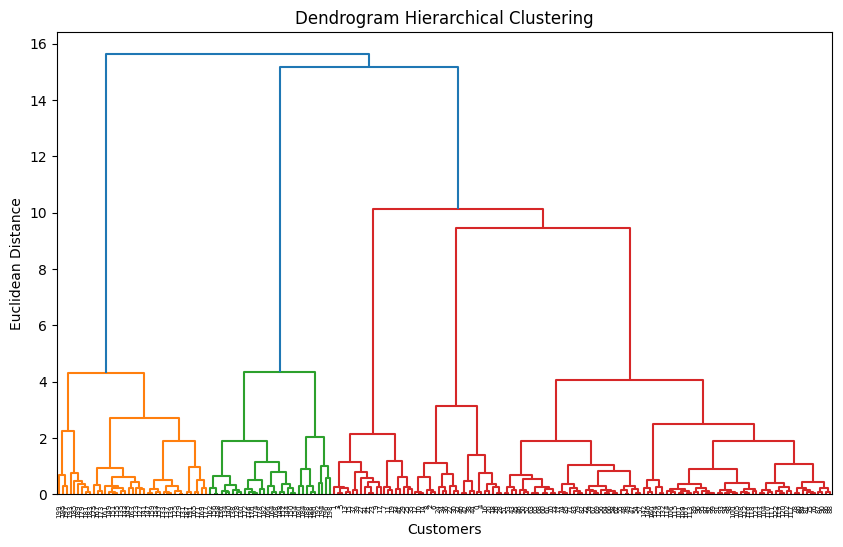

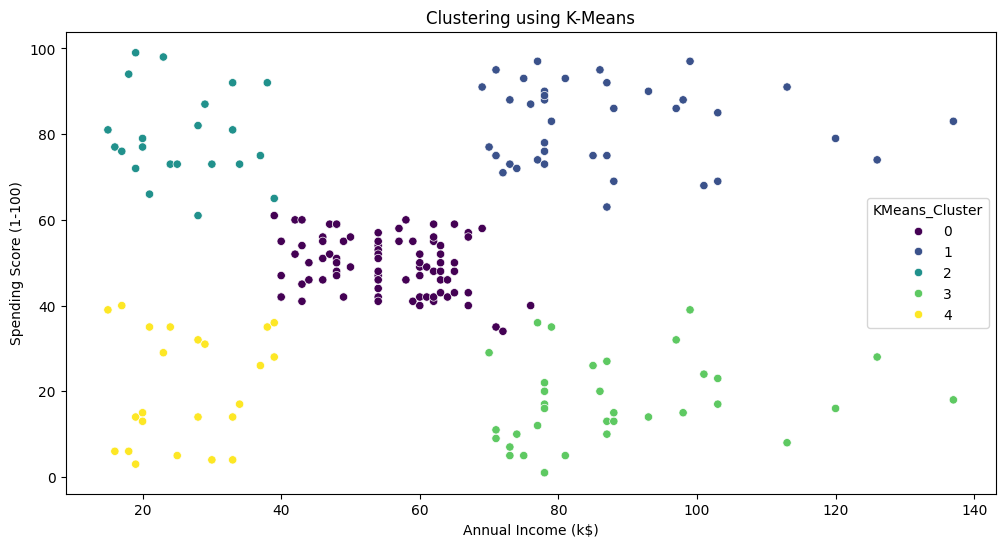

In [9]:
# Langkah 5: Menggunakan algoritma Hierarchical Clustering
plt.figure(figsize=(10, 6))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrogram Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

# Langkah 6: Evaluasi hasil clustering
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', data=data, palette='viridis')
plt.title('Clustering using K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

**Pemilihan Dataset:**

Untuk tugas clustering ini, saya telah memilih dataset "Mall Customer Segmentation Data" yang dapat diunduh dari Kaggle. Dataset ini berisi informasi tentang pelanggan mall, termasuk fitur-fitur seperti usia, gaji tahunan, dan skor pengeluaran. Dataset ini cocok untuk melakukan segmentasi pelanggan berdasarkan perilaku pembelian.

**Proses Pengolahan Data:**

1. Memuat dataset dan mengeksplorasinya untuk memahami struktur dan jenis fitur yang tersedia.
2. Memilih fitur yang akan digunakan untuk clustering, dalam kasus ini adalah "Annual Income (k$)" dan "Spending Score (1-100)".
3. Standarisasi/normalisasi data untuk memastikan skala yang seragam dan membantu konsistensi dalam clustering.

**Implementasi Algoritma:**

**k-Means Clustering:**
1. Menggunakan pustaka `scikit-learn` untuk mengimplementasikan algoritma k-Means Clustering.
2. Memilih jumlah kluster yang optimal menggunakan metode elbow.
3. Melakukan clustering pada data yang telah disiapkan.

**Hierarchical Clustering:**
1. Menggunakan pustaka `scipy` untuk mengimplementasikan algoritma Hierarchical Clustering.
2. Menggunakan metode linkage "ward" untuk menghitung jarak antara cluster.
3. Membuat dendrogram untuk visualisasi hasil clustering.

**Interpretasi Hasil:**

Setelah melakukan clustering, hasilnya dapat diinterpretasikan dengan menganalisis struktur dan karakteristik dari setiap cluster yang dihasilkan. Ini dapat dilakukan dengan melihat plot dari hasil clustering atau dengan menggunakan metrik evaluasi clustering seperti silhouette score. Hasil interpretasi akan membantu kita memahami kelompok-kelompok yang terbentuk dan memperoleh wawasan tentang karakteristik setiap kelompok.

**Soal:**

1. **Apa itu elbow method dan bagaimana ia digunakan dalam menentukan jumlah cluster?**
   Elbow method adalah teknik yang digunakan untuk menentukan jumlah kluster optimal dalam algoritma k-Means Clustering. Ide utamanya adalah untuk mencari titik di mana penambahan jumlah kluster tidak lagi memberikan penurunan signifikan dalam inersia (within-cluster sum of squares). Ini dapat dilihat pada plot inersia terhadap jumlah kluster, di mana terdapat "siku" atau "elbow" di mana penurunan inersia tidak signifikan lagi. Jumlah kluster yang dipilih adalah jumlah kluster di sekitar "siku" tersebut.

2. **Jelaskan perbedaan antara k-means clustering dan hierarchical clustering.**
   - k-Means Clustering: Memiliki jumlah kluster yang telah ditentukan sebelumnya, menggunakan metode iteratif untuk memindahkan centroid dan mengelompokkan data ke dalam kluster. Cocok untuk data yang memiliki jumlah kluster yang jelas dan besar.
   - Hierarchical Clustering: Menghasilkan dendrogram yang menunjukkan hubungan hierarkis antara data. Tidak memerlukan jumlah kluster yang telah ditentukan sebelumnya. Cocok untuk data yang memiliki struktur hierarkis yang tidak jelas dan jumlah kluster yang tidak diketahui.

3. **Bagaimana Anda menginterpretasikan hasil dari algoritma clustering?**
   Hasil dari algoritma clustering dapat diinterpretasikan dengan menganalisis karakteristik dan pola dari setiap cluster yang terbentuk. Ini dapat dilakukan dengan melihat centroid atau representasi pusat dari setiap cluster, serta dengan memvisualisasikan cluster menggunakan plot atau dendrogram. Interpretasi juga melibatkan analisis lebih lanjut tentang bagaimana setiap cluster berbeda satu sama lain dan bagaimana karakteristiknya relevan dengan konteks masalah yang ada.